<a href="https://colab.research.google.com/github/ueche/ml-class/blob/main/Ulysses_Echeverria_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

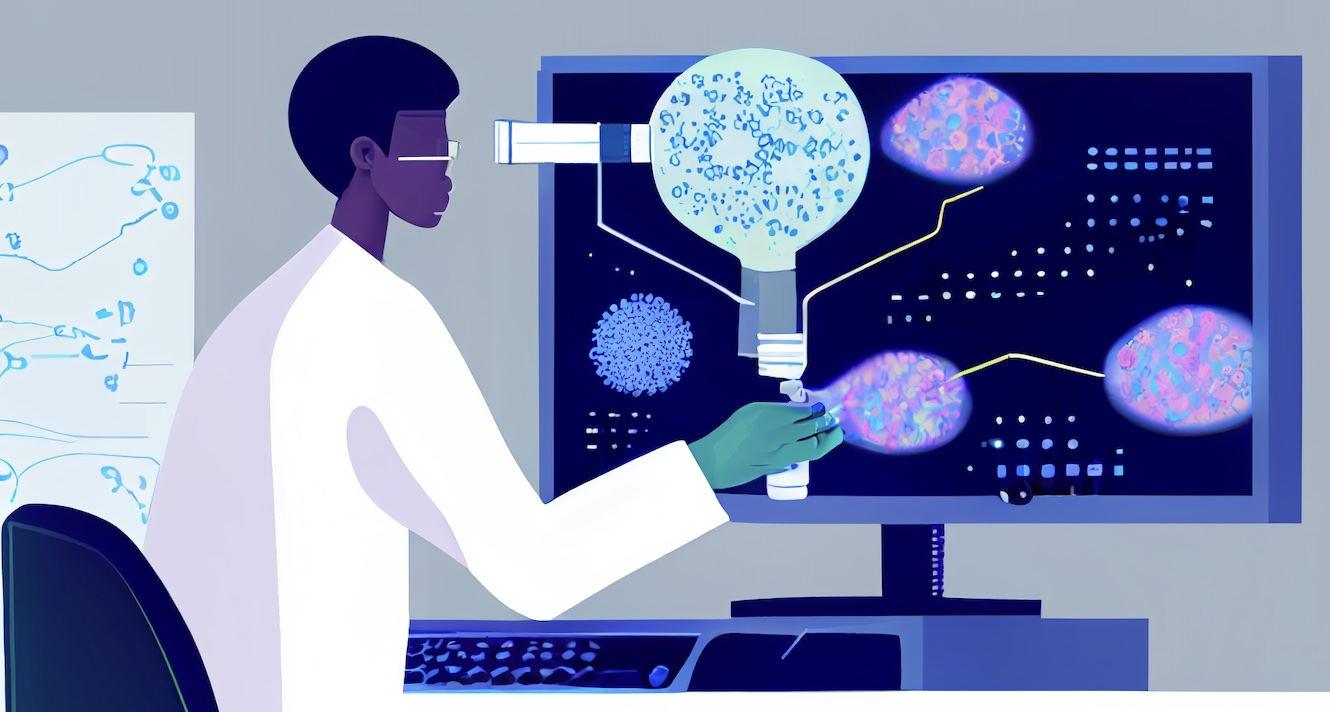

# **Breast Cancer**

Breast cancer is amongst the most prevalent cancers in women world-wide. Early detection is the most crucial factor for better outcomes. According to statistics from the World Health Organization, breast cancer is the most common cancer among women worldwide, accounting for 25% of all cancer cases. In 2020, an estimated 2.3 million new cases were diagnosed, representing about 11.7% of all new cancer cases and 6.9% of all cancer deaths worldwide.

Early detection through regular breast cancer screening can significantly improve the chances of survival and reduce the need for aggressive treatment. Studies show that women who have breast cancer detected at an early stage have a 90% or higher survival rate. More advanced stages of breast cancer, have a survival rate of only 24%.

Machine Learning can behave a significant impact in making screening more affordable and more available to women worlwide. 



### **About the data**
 
The Breast Cancer Wisconsin (Diagnostic) Data Set was downloaded from the WCI Machine Learning Repository via the Keggle website that provides the data in a .CSV file format. The download link is below.


https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv#:~:text=calendar_view_week-,data,-.csv


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**Attribute Information:**
The dataset consists of XX records and the following attibutes:
1- ID number.
2- Diagnosis (M = malignant, B = benign).
3- 32 are derived from the following ten real-valued features below to include 2 additional columns concisting of the standard error and "worst" or largest value from each of the ten features below, totaling 30 feature colums in the dataset: 

1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)

More information abot the datat set can be found at: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### **Lets get started!!!**

### **Import the Dependencies**

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

# to import breast cancer dataset
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



### **Download the data**

This data is used so often with sci-kitLearn that they provide a very practical way of downloading the data directly from them using the fucntion sklearn.datasets.load_breast_cancer()

You can see the details of this function at sci-kitLearn link:
https://github.com/scikit-learn/scikit-learn/blob/364c77e047ca08a95862becf40a04fe9d4cd2c98/sklearn/datasets/_base.py#L672

In [3]:
# load datta from sklearn directly
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()


In [4]:
# data is key 1st array, target values are in the 2nd array, target names are in the 3rd array

print(breast_cancer_dataset)


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

### **Preprocess the data**

In [5]:
# load data to a pandas data frame

data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
# print first five rows

data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# adding the target column to the data frame

data_frame['label'] = breast_cancer_dataset.target

In [8]:
# print the last 5 rows of the data frame

data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
# number of rows and columns

data_frame.shape

# 569 rows by 31 columns

(569, 31)

In [10]:
# getting more information about the data

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# confirming there are no missing values in the dataset
# gives you the number of occurrences in each column for missing values
data_frame.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
# statistical measures about the data. very useful in data analysis

data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
# checking for the distribution of the target variable

data_frame['label'].value_counts()

# 1 represents benign and 0 represents malignant

1    357
0    212
Name: label, dtype: int64


**1 --> Benign**

**0 --> Malignant**



In [14]:
# values of mean per label type by feature

data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
# values of mean per label type by feature

data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [16]:
# Split the data by input features and target(label). 
# axis=1 is column and axis=0 is row

X = data_frame.drop(columns='label', axis=1) 
Y = data_frame['label']

In [17]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [18]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Split the data into training and testing data. 20% of the data will be used for testing.

In [19]:
# split the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [20]:
print(X.shape, X_train.shape, X_test.shape)


(569, 30) (455, 30) (114, 30)


**Standardize the data**

In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
#load StandardScaler function
scaler = StandardScaler()

# fit the training data to the function and transform the training data only, not the test data
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


In [23]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


### **Create and train the model by fiting the data to the model.**

**Build the Neural Network**

In [24]:
# importing tensor flow and keras libraries
# tensorflow and keras are widely used for neural networks

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras


In [25]:
from keras.layers.serialization import activation
from keras.api._v2.keras import layers
# the neural network will have 3 layers: input, hiddden and output

model = keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          #keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
                          ])


In [26]:
# compiling the Neural nNetwork

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
# training the Neural Network
# trained the NN model with X_train_std normalized values instead of the un-normalized X_train values 
# and increased the model validation accuracy significantly

history = model.fit(X_train_std, Y_train, 
                    validation_split=0.1, 
                    epochs=10)

Epoch 1/10
13/13 [==============================] - 3s 63ms/step - loss: 0.5831 - accuracy: 0.7164 - val_loss: 0.3803 - val_accuracy: 0.9130
Epoch 2/10
13/13 [==============================] - 0s 26ms/step - loss: 0.4264 - accuracy: 0.8460 - val_loss: 0.2865 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 22ms/step - loss: 0.3295 - accuracy: 0.8949 - val_loss: 0.2305 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2727 - accuracy: 0.9120 - val_loss: 0.1953 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 29ms/step - loss: 0.2322 - accuracy: 0.9267 - val_loss: 0.1722 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 16ms/step - loss: 0.2044 - accuracy: 0.9340 - val_loss: 0.1552 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 26ms/step - loss: 0.1820 - accuracy: 0.9462 - val_loss: 0.1416 - val_accuracy: 0.9783
Epoch 8/10
13/

**Plotting the accuracy and loss**

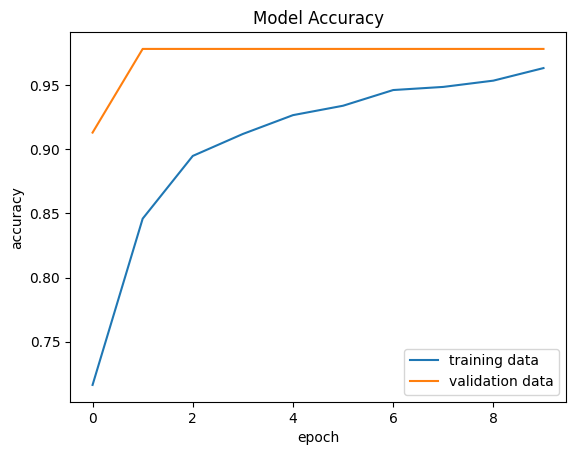

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

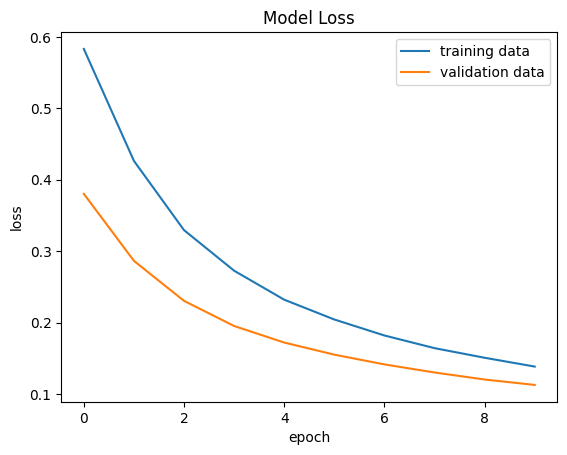

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

### **Test the model's accuracy on the test data**

In [30]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Accuracy %f    Loss: %f" % (accuracy, loss))

4/4 [==============================] - 0s 5ms/step - loss: 0.1352 - accuracy: 0.9649
Accuracy 0.964912    Loss: 0.135215


In [31]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [32]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [33]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.4117518 0.5738625]


In [34]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [35]:
print(Y_pred)

[[0.4117518  0.5738625 ]
 [0.61732453 0.5606879 ]
 [0.08133841 0.9791409 ]
 [0.97872984 0.00275624]
 [0.44672933 0.5442868 ]
 [0.9068865  0.05172599]
 [0.37627745 0.73935026]
 [0.23905195 0.9687509 ]
 [0.24279742 0.8959048 ]
 [0.41466358 0.93516725]
 [0.43697083 0.6891285 ]
 [0.21536966 0.90848064]
 [0.3491869  0.850112  ]
 [0.33839595 0.7667216 ]
 [0.23159315 0.92064875]
 [0.6593245  0.20271826]
 [0.17684181 0.96309716]
 [0.11711526 0.9092074 ]
 [0.21274564 0.8845524 ]
 [0.8600517  0.04523941]
 [0.40808907 0.8648798 ]
 [0.14556956 0.9488488 ]
 [0.1669284  0.9439142 ]
 [0.2278621  0.9656486 ]
 [0.5059802  0.8254185 ]
 [0.7629268  0.24946788]
 [0.2938531  0.80993015]
 [0.4427947  0.7405663 ]
 [0.75598294 0.5025001 ]
 [0.7604142  0.22424759]
 [0.43530628 0.9098758 ]
 [0.22854626 0.89476824]
 [0.2374807  0.91597754]
 [0.94265914 0.02977642]
 [0.8960562  0.14073408]
 [0.26313022 0.8474945 ]
 [0.1797     0.9830028 ]
 [0.4192258  0.81664956]
 [0.12277569 0.967715  ]
 [0.20931749 0.9241599 ]


**model.predict() gives the prediction probability for that datapoint**

It is a confidence value of the result:

In [36]:
# argmax function

my_list = [30,20]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)


[30, 20]
0


In [37]:
# converting the prediction probability to the class labels
# takes the highest of the two values and assigns a corresponding label of 0 or 1.

Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [38]:
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


### **Building the predictive system**

In [39]:
sample_data = (12.36,21.8,79.78,466.1,0.08772,0.09445,0.06015,0.03745,0.193,0.06404,0.2978,1.502,2.203,20.95,0.007112,0.02493,0.02703,0.01293,0.01958,0.004463,13.83,30.5,91.46,574.7,0.1304,0.2463,0.2434,0.1205,0.2972,0.09261)

input_data = (sample_data)

#convert the input_data to a numpy array and then reshape it to provide one datapoint (prediction)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
input_data_std = scaler.transform(input_data_reshaped)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# generate the prediction from the normalized input_data

prediction = model.predict(input_data_std)
print(prediction)

# generate the prediction label by applying the argmax to the prediction
prediction_label = [np.argmax(prediction)]
print(prediction_label)

# communicate the outcome
if(prediction_label[0] == 0):
  print('The prediction is malignant')

else: 
  print('The prediction is benign')

  

1/1 [==============================] - 0s 27ms/step
[[0.36704096 0.7435157 ]]
[1]
The prediction is benign


We end the project with a working prdictive model with over 96% accuracy and effectively demosndtrated what an important role Machine learning will have in the future of medical imaging diagnosis. 